In [0]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import train_test_split

In [108]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Getting data into a dataframe
path="/content/drive/My Drive/Colab_Notebooks/ass14/preprocessed_data.csv"
df = pd.read_csv(path)

In [150]:
df.head(5)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00
3,ga,mrs,grades_prek_2,2,1,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04
4,wa,mrs,grades_3_5,2,1,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74


In [151]:
df.columns

Index(['school_state', 'teacher_prefix', 'project_grade_category',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price'],
      dtype='object')

In [152]:
df.shape

(109248, 9)

In [0]:
#df = df.sample(n=40000)
#project_data=project_data.tail(1000)
#project_data.shape

### Spliting dataset

In [154]:
y=df['project_is_approved']
y.shape

(109248,)

In [155]:
features = df.drop(["project_is_approved"],axis=1)
features.shape

(109248, 8)

In [0]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

#split the data into train and test fo bag of words

x_train,x_test,y_train,y_test=model_selection.train_test_split(features,y,test_size=0.33,stratify=y,random_state=0)
#split train into cross val train and cross val test
#x_train,x_cv,y_train,y_cv=model_selection.train_test_split(x_t,y_t,test_size=0.3,random_state=0)

In [157]:
print(x_train.shape)
print("+++++++++++++")
print(x_test.shape)

(73196, 8)
+++++++++++++
(36052, 8)


In [0]:
# Preparing Text Data As per Our Model
x_train["len_essay"] = x_train["essay"].apply(len)
x_test["len_essay"] = x_test["essay"].apply(len)

#### Distribution plot of essay dataset

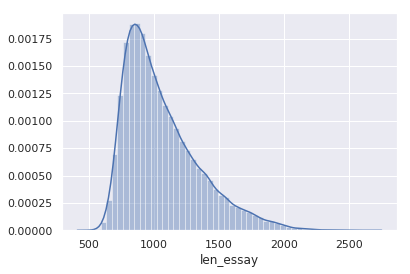

In [159]:
sns.set()
ax = sns.distplot(x_train["len_essay"])


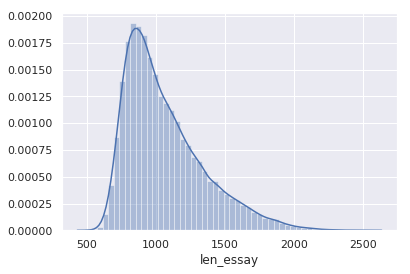

In [160]:
ax = sns.distplot(x_test["len_essay"])

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

## Calculate IDF value

In [0]:
# Filtering Text Data based on idf values

tfidf = TfidfVectorizer()
combine_tfidf = tfidf.fit_transform(x_train["essay"])

# converting to dictionary
combine_dict = dict(zip(tfidf.get_feature_names(),list(tfidf.idf_)))
tfidf_df = pd.DataFrame(list(combine_dict.items()), columns=['Words', 'IDF_Values'])
tfidf_df = tfidf_df.sort_values(by ='IDF_Values' )

In [163]:
print(tfidf_df["IDF_Values"].min())
print(tfidf_df["IDF_Values"].max())

1.0080242390926728
11.50776253494305


Text(0.5, 1.0, 'Violin plot of idf')

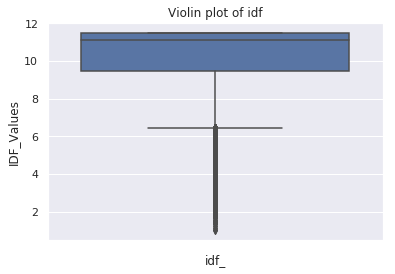

In [164]:
sns.boxplot(x = "IDF_Values",data=tfidf_df,orient="v")
plt.xlabel("idf_")
plt.title("Violin plot of idf")

Text(0.5, 1.0, 'Violin plot of idf')

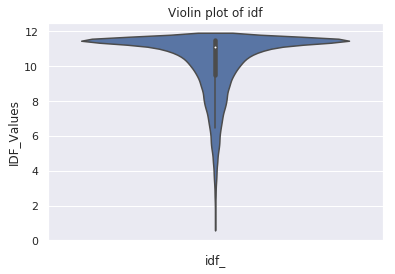

In [165]:
sns.violinplot(x = "IDF_Values",data=tfidf_df,orient="v")
plt.xlabel("idf_")
plt.title("Violin plot of idf")

In [166]:
print("\nQuantiles:")
print(np.percentile(tfidf_df['IDF_Values'],np.arange(0, 100, 25)))


Quantiles:
[ 1.00802424  9.49285951 11.10229743 11.50776253]


In [167]:
print("\n25th Percentiles:")
print(np.percentile(tfidf_df['IDF_Values'],25))
print("\n75th Percentiles:")
print(np.percentile(tfidf_df['IDF_Values'],75))

print("\n90th Percentiles:")
print(np.percentile(tfidf_df['IDF_Values'],90))


25th Percentiles:
9.492859514400784

75th Percentiles:
11.50776253494305

90th Percentiles:
11.507762534943051


Consider words that have idf values between 25th and 75th percentile because most important and most rare words both are not good for model


In [168]:
print(tfidf_df.shape)
tfidf_filtered = tfidf_df[tfidf_df["IDF_Values"] <=  np.percentile(tfidf_df['IDF_Values'],25)]
print("dimension after removing words", tfidf_filtered.shape)

(48463, 2)
dimension after removing words (12374, 2)


In [169]:
#selecting important words between 25th and 75th percentile
corpus = tfidf_filtered["Words"].tolist()
corpus[:10]

['students',
 'nannan',
 'school',
 'my',
 'learning',
 'classroom',
 'not',
 'learn',
 'the',
 'they']

In [0]:
# convert the sentences (strings) into integers
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
sequences_train = tokenizer.texts_to_sequences(x_train["essay"])
sequences_test = tokenizer.texts_to_sequences(x_test["essay"])

In [171]:
sequences_train

[[24,
  6,
  1770,
  26,
  927,
  15,
  3063,
  6387,
  7132,
  12,
  1,
  30,
  741,
  1632,
  3,
  10,
  140,
  19,
  1259,
  1807,
  440,
  828,
  3084,
  69,
  974,
  689,
  36,
  99,
  12,
  1,
  480,
  4064,
  712,
  177,
  940,
  111,
  9,
  3579,
  1269,
  248,
  442,
  1,
  292,
  229,
  2639,
  185,
  37,
  32,
  61,
  608,
  560,
  2589,
  6,
  1649,
  118,
  1717,
  137,
  12,
  1,
  113,
  5983,
  2388,
  295,
  3149,
  6,
  608,
  10,
  458,
  11700,
  2001,
  3355,
  2069,
  1254,
  2138,
  1719,
  245,
  608,
  133,
  167,
  292,
  521,
  347,
  55,
  8,
  343,
  437,
  1,
  221,
  2138,
  1757,
  71,
  15,
  30,
  437,
  103,
  5465,
  571,
  1656,
  64,
  592,
  887,
  11,
  734,
  1,
  25,
  130,
  776,
  484,
  521,
  3949,
  3077,
  273,
  46,
  494,
  1,
  3827,
  4,
  1,
  38,
  3803,
  5700,
  5836,
  1699,
  2634,
  1229,
  232,
  226,
  3332,
  547,
  423,
  1347,
  2705,
  658,
  413,
  388,
  11,
  120,
  1,
  322,
  369,
  151,
  566,
  3,
  26,
  1613,
  2

In [172]:
print("No. of datapoints in X_train :",len(x_train))
print("No. of datapoints in X_test :",len(x_test))
print("Shape of Y_train :",y_train.shape)
print("Shape of Y_test :",y_test.shape)

No. of datapoints in X_train : 73196
No. of datapoints in X_test : 36052
Shape of Y_train : (73196,)
Shape of Y_test : (36052,)


In [173]:
# get word -> integer mapping
word2idx = tokenizer.word_index
print('Found %s unique tokens.' % len(word2idx))

Found 12374 unique tokens.


In [0]:
# importing required libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from keras.layers import Input, Embedding, LSTM, Dropout, BatchNormalization, Dense, concatenate, Flatten, Conv1D, MaxPool1D, LeakyReLU, ELU, SpatialDropout1D, MaxPooling1D, GlobalAveragePooling1D, GlobalMaxPooling1D
from keras.preprocessing.text import Tokenizer, one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model, load_model
from keras import regularizers
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, ReduceLROnPlateau
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import roc_auc_score
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import re
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import pickle

In [175]:
# truncate and/or pad input sequences
max_review_length = 800
encoded_train = pad_sequences(sequences_train,maxlen=max_review_length,padding='post', truncating='post')
encoded_test = pad_sequences(sequences_test, maxlen=max_review_length,padding='post', truncating='post')
print('Shape of train data tensor:', encoded_train.shape)
print('Shape of test data tensor:', encoded_test.shape)

print(encoded_train[1])

Shape of train data tensor: (73196, 800)
Shape of test data tensor: (36052, 800)
[   24     3  4340  2491  1674  2692  2784    24     3  4873  1405  4268
  1041  1463  2692    24     1    18   113   153  4537   828   874   143
   366   265   307    38   143   366    14   989   443  2692     7  2062
   257     3   989   340    24  1531    13  1480   874  2674    14    94
   874  2674  2643  1761    11    38  4537   168  4774  4705   724     3
   724   168  4461    24     3  4294  2491  1674  1565     3   989   181
   874  9576   443    24     1  5857    98  1257   221     3    73  5427
    10    21   168  4774  4705   724   228   656  5427  7632  1742   141
     1    15  3114   172   168    24     1  2785  9576    15    38   366
  4537   838   955    51    10  3699    13  2189  2571 10551  1480    29
   989   999   544    43     3     2     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0 

In [0]:
# Loading Embedding File
pickle_in = open("glove_vectors","rb")
glove_words = pickle.load(pickle_in)

In [177]:
MAX_VOCAB_SIZE=5000
num_words = min(MAX_VOCAB_SIZE, len(word2idx) + 1)
embedding_matrix = np.zeros((num_words, 300))
for word, i in word2idx.items():
  if i < MAX_VOCAB_SIZE:
    embedding_vector = glove_words.get(word)
    if embedding_vector is not None:
      # words not found in embedding index will be all zeros.
      embedding_matrix[i] = embedding_vector


print(num_words)
print("+++++++++")
print(embedding_matrix.shape)

5000
+++++++++
(5000, 300)


In [0]:
# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
MAX_SEQUENCE_LENGTH=800
embedding_layer = Embedding(
  num_words,
  300,
  weights=[embedding_matrix],
  input_length=MAX_SEQUENCE_LENGTH,
  trainable=False
)
input_text = Input(shape=(MAX_SEQUENCE_LENGTH,),name="input_text")
x = embedding_layer(input_text)
x = LSTM(128,recurrent_dropout=0.5,kernel_regularizer=regularizers.l2(0.001),return_sequences=True)(x) # dropout=0.5
# x = SpatialDropout1D(0.5)(x)
flatten_1 = Flatten()(x)

### caregorical variable

In [179]:
# Now will prepare all the remaining categorical features
# Teacher Prefix
no_of_unique_prefix  = x_train["teacher_prefix"].nunique()
embedding_size_prefix = int(min(np.ceil((no_of_unique_prefix)/2), 50 ))
print('Unique Categories:', no_of_unique_prefix,'Embedding Size:', embedding_size_prefix)


# Defining Input and Embedding Layer for the same

input_prefix = Input(shape=(1,),name="teacher_prefix")
embedding_prefix = Embedding(no_of_unique_prefix,embedding_size_prefix,name="emb_pre",trainable=True)(input_prefix)
flatten_2 = Flatten()(embedding_prefix)

lb = LabelEncoder()
encoder_prefix_train = lb.fit_transform(x_train["teacher_prefix"])
# encoder_prefix_cv = lb.transform(X_cv["teacher_prefix"])
encoder_prefix_test = lb.transform(x_test["teacher_prefix"])

Unique Categories: 5 Embedding Size: 3


In [180]:
# School State
no_of_unique_state  = x_train["school_state"].nunique()
embedding_size_state= int(min(np.ceil((no_of_unique_state)/2), 50 ))
print('Unique Categories:', no_of_unique_state,'Embedding Size:', embedding_size_state)


# Defining Input and Embedding Layer for the same

input_state = Input(shape=(1,),name="school_prefix")
embedding_state = Embedding(no_of_unique_state,embedding_size_state,name="emb_state",trainable=True)(input_state)
flatten_3 = Flatten()(embedding_state)


encoder_state_train = lb.fit_transform(x_train["school_state"])
# encoder_state_cv = lb.transform(X_cv["school_state"])
encoder_state_test = lb.transform(x_test["school_state"])

Unique Categories: 51 Embedding Size: 26


In [181]:
# For project_grade_category
no_of_unique_grade  = x_train["project_grade_category"].nunique()
embedding_size_grade = int(min(np.ceil((no_of_unique_grade)/2), 50 ))
print('Unique Categories:', no_of_unique_grade,'Embedding Size:', embedding_size_grade)


# Defining Input and Embedding Layer for the same

input_grade= Input(shape=(1,),name="grade_cat")
embedding_grade = Embedding(no_of_unique_grade,embedding_size_grade,name="emb_grade",trainable=True)(input_grade)
flatten_4 = Flatten()(embedding_grade)


encoder_grade_train = lb.fit_transform(x_train["project_grade_category"])
# encoder_grade_cv = lb.transform(X_cv["project_grade_category"])
encoder_grade_test = lb.transform(x_test["project_grade_category"])

Unique Categories: 4 Embedding Size: 2


In [182]:
# For clean_categories
no_of_unique_subcat  = x_train["clean_categories"].nunique()
embedding_size_subcat = int(min(np.ceil((no_of_unique_subcat)/2), 50 ))
print('Unique Categories:', no_of_unique_subcat,'Embedding Size:', embedding_size_subcat)


# Defining Input and Embedding Layer for the same

input_subcat= Input(shape=(1,),name="sub_cat")
embedding_subcat = Embedding(no_of_unique_subcat,embedding_size_subcat,name="emb_subcat",trainable=True)(input_subcat)
flatten_5 = Flatten()(embedding_subcat)


# encoder_subcat_train = lb.fit_transform(x_train["clean_categories"])
# encoder_subcat_cv = lb.transform(X_cv["clean_categories"])
# encoder_subcat_test = lb.transform(x_test["clean_categories"])
le = LabelEncoder()
le.fit(x_train["clean_categories"])
x_test["clean_categories"] = x_test["clean_categories"].map(lambda s: '<unknown>' if s not in le.classes_ else s)
# X_cv["clean_categories"] = X_cv["clean_categories"].map(lambda s: '<unknown>' if s not in le.classes_ else s)
le.classes_ = np.append(le.classes_, '<unknown>')
encoder_subcat_train = le.transform(x_train["clean_categories"])
encoder_subcat_test= le.transform(x_test["clean_categories"])
# encoder_subcat_cv = le.transform(X_cv["clean_categories"])

Unique Categories: 51 Embedding Size: 26


In [183]:
# For clean_subcategories
no_of_unique_subcat_1  = x_train["clean_subcategories"].nunique()
embedding_size_subcat_1 = int(min(np.ceil((no_of_unique_subcat_1)/2), 50 ))
print('Unique Categories:', no_of_unique_subcat_1,'Embedding Size:', embedding_size_subcat_1)

# Defining Input and Embedding Layer for the same

input_subcat_1= Input(shape=(1,),name="sub_cat_1")
embedding_subcat_1 = Embedding(no_of_unique_subcat_1+1,embedding_size_subcat_1,name="emb_subcat_1",trainable=True)(input_subcat_1)#adding +1
flatten_6 = Flatten()(embedding_subcat_1)


le = LabelEncoder()
le.fit(x_train["clean_subcategories"])
x_test["clean_subcategories"] = x_test["clean_subcategories"].map(lambda s: '<unknown>' if s not in le.classes_ else s)
# X_cv["clean_subcategories"] = X_cv["clean_subcategories"].map(lambda s: '<unknown>' if s not in le.classes_ else s)
le.classes_ = np.append(le.classes_, '<unknown>')
encoder_subcat_1_train = le.transform(x_train["clean_subcategories"])
encoder_subcat_1_test= le.transform(x_test["clean_subcategories"])
# encoder_subcat_1_cv = le.transform(X_cv["clean_subcategories"])

Unique Categories: 390 Embedding Size: 50


### numerical data

In [0]:
# Now we will prepare numerical features for our model
num_train_1=x_train['len_essay'].values.reshape(-1, 1)
num_train_2=x_train['price'].values.reshape(-1, 1)
num_train_3=x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1)

num_test_1=x_test['len_essay'].values.reshape(-1, 1)
num_test_2=x_test['price'].values.reshape(-1, 1)
num_test_3=x_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1)


num_train=np.concatenate((num_train_1,num_train_2,num_train_3),axis=1)

num_test=np.concatenate((num_test_1,num_test_2,num_test_3),axis=1)

In [0]:
from sklearn.preprocessing import StandardScaler
norm=StandardScaler()
norm_train=norm.fit_transform(num_train)
norm_test=norm.transform(num_test)

In [0]:
# Defining the Input and Embedding Layer for the same
num_feats = Input(shape=(3,),name="numerical_features")
num_feats_ = Dense(100,activation="relu",kernel_initializer="he_normal",kernel_regularizer=regularizers.l2(0.001))(num_feats)

In [0]:
x_concatenate = concatenate([flatten_1,flatten_2,flatten_3,flatten_4,flatten_5,flatten_6,num_feats_])

In [192]:
print("Building Model-2")

# x_concatenate = BatchNormalization()(x_concatenate)
x = Dense(128,activation="relu", kernel_initializer="he_normal",kernel_regularizer=regularizers.l2(0.001))(x_concatenate)
# x=LeakyReLU(alpha=0.3)(x)
x=Dropout(0.5)(x)
x = Dense(256,activation="relu",kernel_initializer="he_normal",kernel_regularizer=regularizers.l2(0.001))(x)
# x=LeakyReLU(alpha=0.3)(x)
x=Dropout(0.5)(x)
x = Dense(64,activation="relu", kernel_initializer="he_normal",kernel_regularizer=regularizers.l2(0.001))(x)
x = BatchNormalization()(x)
# x=LeakyReLU(alpha=0.3)(x)
output = Dense(2, activation='softmax', name='output')(x)
model_2 = Model(inputs=[input_text,input_prefix,input_state,input_grade,
                        input_subcat,input_subcat_1,num_feats],outputs=[output])

Building Model-2


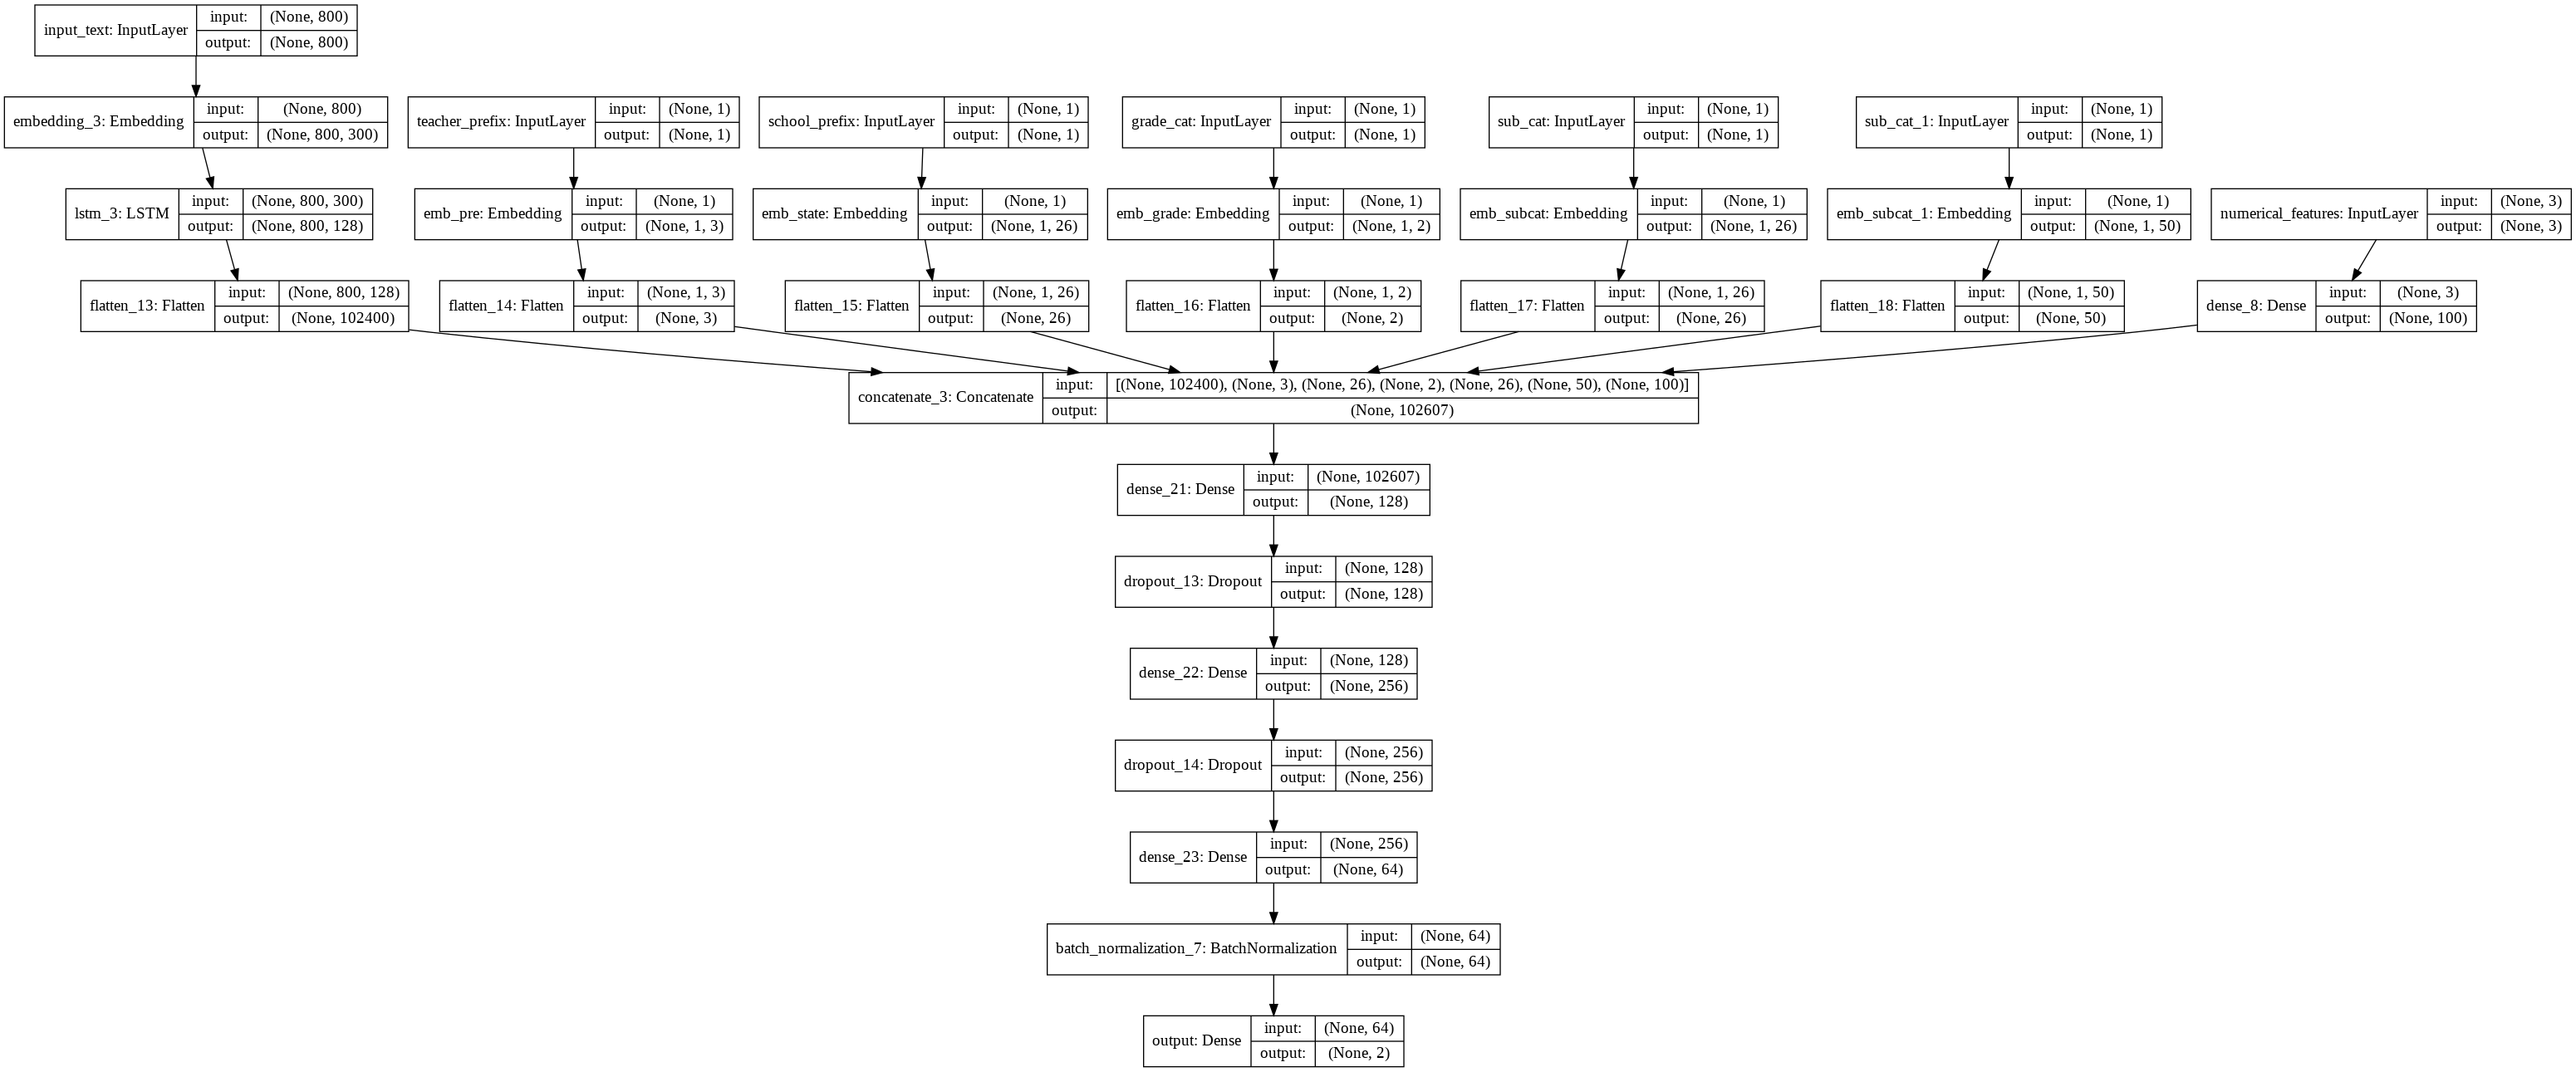

In [193]:
# https://github.com/mmortazavi/EntityEmbedding-Working_Example/blob/master/EntityEmbedding.ipynb
#https://stackoverflow.com/questions/36886711/keras-runtimeerror-failed-to-import-pydot-after-installing-graphviz-and-pyd
from keras.utils import plot_model
import keras
import pydotplus
from keras.utils.vis_utils import model_to_dot
#keras.utils.vis_utils.pydot = pydot

#import pydot_ng as pydot
plot_model(model_2, show_shapes=True, show_layer_names=True, to_file='model_2.png')
from IPython.display import Image
Image(retina=True, filename='model_2.png')

In [0]:
train_data_1 = [encoded_train,encoder_prefix_train,encoder_state_train,
              encoder_grade_train,encoder_subcat_train,encoder_subcat_1_train,norm_train]
test_data_1 = [encoded_test,encoder_prefix_test,encoder_state_test,encoder_grade_test,
             encoder_subcat_test,encoder_subcat_1_test,norm_test]

from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train, 2) 
Y_test = np_utils.to_categorical(y_test, 2)

In [196]:
train_data_1

[array([[  24,    6, 1770, ...,    0,    0,    0],
        [  24,    3, 4340, ...,    0,    0,    0],
        [ 272,    1,   72, ...,    0,    0,    0],
        ...,
        [ 433,   80,   72, ...,    0,    0,    0],
        [   4,    1,   16, ...,    0,    0,    0],
        [   9,    1,    3, ...,    0,    0,    0]], dtype=int32),
 array([3, 2, 3, ..., 3, 1, 3]),
 array([10, 18, 25, ...,  3, 44, 24]),
 array([2, 2, 1, ..., 3, 1, 0]),
 array([24, 13, 32, ..., 28, 37,  5]),
 array([321, 386, 333, ..., 322, 274, 101]),
 array([[ 0.33937884, -0.56099415, -0.32872133],
        [-0.72055062, 12.11960187, -0.32872133],
        [-0.95570053, -0.81647708, -0.32872133],
        ...,
        [ 0.63419366, -0.34679889, -0.36476579],
        [ 0.25865574,  3.57720768, -0.11245454],
        [ 1.402818  ,  0.6855579 , -0.32872133]])]

In [0]:
checkpoint_1 = ModelCheckpoint("model_2.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop_1 = EarlyStopping(monitor = 'val_loss', 
                            mode="min",
                            min_delta = 0, 
                            patience = 2,
                            verbose = 1,
                            restore_best_weights = True)

reduce_lr_1 = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 1, verbose = 1, min_delta = 0.0001)

tensorboard_1 = TensorBoard(log_dir='graph_2', histogram_freq=0, batch_size=512, write_graph=True, write_grads=False, write_images=False, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None, embeddings_data=None, update_freq='epoch')

callbacks_1 = [checkpoint_1,earlystop_1,tensorboard_1,reduce_lr_1]

In [0]:
# Defining Custom ROC-AUC Metrics
from sklearn.metrics import roc_auc_score

def auc1(y_true, y_pred):
    if len(np.unique(y_true[:,1])) == 1:
        return 0.5
    else:
        return roc_auc_score(y_true, y_pred)

def auroc(y_true, y_pred):
    return tf.py_func(auc1, (y_true, y_pred), tf.double)

In [0]:
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [0]:
model_2.compile(optimizer=adam, loss='categorical_crossentropy', metrics=[auroc])

In [206]:
history_2 = model_2.fit(train_data_1,Y_train,batch_size=512,
                        epochs=20,validation_data=(test_data_1,Y_test),callbacks=callbacks_1)

Train on 73196 samples, validate on 36052 samples
Epoch 1/20
73196/73196 [==============================] - 314s 4ms/step - loss: 1.4143 - auroc: 0.5157 - val_loss: 0.9806 - val_auroc: 0.5816

Epoch 00001: val_loss improved from inf to 0.98064, saving model to model_2.h5
Epoch 2/20
73196/73196 [==============================] - 312s 4ms/step - loss: 0.8199 - auroc: 0.6385 - val_loss: 0.7385 - val_auroc: 0.7174

Epoch 00002: val_loss improved from 0.98064 to 0.73851, saving model to model_2.h5
Epoch 3/20
73196/73196 [==============================] - 313s 4ms/step - loss: 0.6496 - auroc: 0.7079 - val_loss: 0.6129 - val_auroc: 0.7305

Epoch 00003: val_loss improved from 0.73851 to 0.61290, saving model to model_2.h5
Epoch 4/20
73196/73196 [==============================] - 313s 4ms/step - loss: 0.5571 - auroc: 0.7288 - val_loss: 0.5395 - val_auroc: 0.7432

Epoch 00004: val_loss improved from 0.61290 to 0.53952, saving model to model_2.h5
Epoch 5/20
73196/73196 [==========================

In [215]:
print(model_2.summary())

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_text (InputLayer)         (None, 800)          0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 800, 300)     1500000     input_text[0][0]                 
__________________________________________________________________________________________________
teacher_prefix (InputLayer)     (None, 1)            0                                            
__________________________________________________________________________________________________
school_prefix (InputLayer)      (None, 1)            0                                            
____________________________________________________________________________________________

In [0]:
my_model = load_model("model_2.h5",custom_objects={"auroc":auroc})

In [0]:
project_status = {0:"Rejected",1:"Approved"}

In [0]:
Y_pred = my_model.predict(test_data_1,batch_size=512)

In [0]:
# took the function from https://nbviewer.jupyter.org/github/pranaya-mathur/Human-Activity-Recognition/blob/master/Human_Activity_Recognition.ipynb
def confusion_matrix(Y_true, Y_pred):
    Y_true = pd.Series([project_status[y] for y in np.argmax(Y_test, axis=1)])
    Y_pred = pd.Series([project_status[y] for y in np.argmax(Y_pred, axis=1)])

    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])

In [214]:
results = confusion_matrix(Y_test,Y_pred)
results

Pred,Approved,Rejected
True,,
Approved,30134,459
Rejected,4801,658


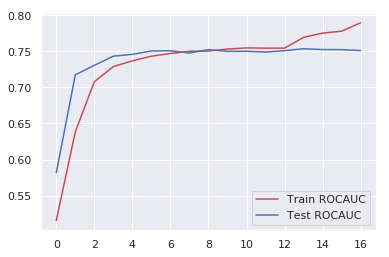

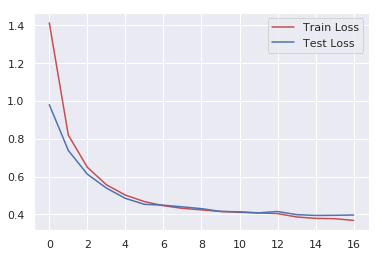

In [216]:
plt.plot(history_2.history['auroc'], 'r')
plt.plot(history_2.history['val_auroc'], 'b')
plt.legend({'Train ROCAUC': 'r', 'Test ROCAUC':'b'})
plt.show()


plt.plot(history_2.history['loss'], 'r')
plt.plot(history_2.history['val_loss'], 'b')
plt.legend({'Train Loss': 'r', 'Test Loss':'b'})
plt.show()

Model is overfitting because at end, train AUC(0.7895) hs higher than test AUC(0.75)